In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.dropbox.com/s/yuhot8a4zaihefj/brainTumor_dataset.zip?dl=0

--2023-04-19 06:23:21--  https://www.dropbox.com/s/yuhot8a4zaihefj/brainTumor_dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/yuhot8a4zaihefj/brainTumor_dataset.zip [following]
--2023-04-19 06:23:22--  https://www.dropbox.com/s/raw/yuhot8a4zaihefj/brainTumor_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf9e9e0caf542eb88b14ccce6be.dl.dropboxusercontent.com/cd/0/inline/B6cg_aN_swf-usnaAiK_TUzSAJrGS9triwtviuaAdoAV7n94n786K19O0do3Jsh0h_g9Gzf0XDQuNBOuah-vwiH6D88wpB_KrGtuB6464Uldrw9OvDLF0BphFczz1I5aaTvP7QMXOfaISE3hxqGjbDwsaLXurxm0AemNN-hwGzgPkg/file# [following]
--2023-04-19 06:23:22--  https://ucf9e9e0caf542eb88b14ccce6be.dl.dropboxusercontent.com/cd/0/inline/B6cg_aN_swf-usnaAiK_TUzSAJrGS9triwtviuaAdoAV7

In [ ]:
!unzip /content/brainTumor_dataset.zip?dl=0

Archive:  /content/brainTumor_dataset.zip?dl=0
   creating: Brain Tumor Data Set/Brain Tumor/
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1006).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1007).jp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
# count the number of images in the respective classes
# 0 - Brain Tumor
# 1 - Healthy Brain

ROOT_DIR = "/content/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# number of images in Healthy and Tumor dataset
number_of_images.items()

dict_items([('Healthey', 2087), ('Brain Tumor', 2513)])

# Data Splitting
## We will split the data into 70%, 15% and 15%
* 70% for Data Training
* 15% for Validation
* 15% for Testing


In [ ]:
def dataFolder(p, split):

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.mkdir("./"+p+"/"+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir) ),
                                  size = (math.floor(split*number_of_images[dir]) - 5),
                                  replace = False):

        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O, D)
        os.remove(O)

  else:
    print(f"{p} Folder exists")

In [ ]:
dataFolder("train", 0.7)

In [ ]:
dataFolder("val", 0.15)

In [ ]:
dataFolder("test", 0.15)

In [ ]:
# to completely remove a folder
# shutil.rmtree({folder path})

## Model Building

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
# CNN Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))

model.add(Conv2D(filters = 36, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

## Preparing the data using Data Generator

In [ ]:
def preprocessingImages1(path):
  """
    input: Path
    output: Pre processed images
  """

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, preprocessing_function=preprocess_input, horizontal_flip = True)

  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
from keras.applications.inception_v3 import preprocess_input

In [ ]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input

In [ ]:
def preprocessingImages2(path):
  """
    input: Path
    output: Pre processed images
  """

  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)

  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
# early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 6, verbose = 1, mode = 'auto')

# model check point
mc = ModelCheckpoint(monitor = "val_accuracy", filepath = "./bestmode.h5", verbose = 1, save_best_only = True, mode = 'auto')

cd = [es, mc]

## Model Training

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [ ]:
base_model = MobileNet(input_shape=(224, 224, 3), include_top= False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation="sigmoid")(X)

model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer='rmsprop', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
# call backs

from keras.callbacks import ModelCheckpoint, EarlyStopping

# model checkpoint
mc = ModelCheckpoint(filepath="bestMode.h5", monitor="val_accuracy", verbose = 1, save_best_only = True)

# early stopping
ec = EarlyStopping(monitor="val_accuracy", min_delta = 0.01, patience = 3, verbose = 1)

cb = mc, es

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch = 8,
                           epochs = 30,
                           validation_data = val_data,
                           validation_steps = 16,
                           callbacks = cb)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 8.7324 - accuracy: 0.5273
Epoch 1: val_accuracy improved from -inf to 0.62891, saving model to bestMode.h5
8/8 [==============================] - 18s 893ms/step - loss: 8.7324 - accuracy: 0.5273 - val_loss: 4.1792 - val_accuracy: 0.6289
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 1.0639 - accuracy: 0.8906
Epoch 2: val_accuracy improved from 0.62891 to 0.83789, saving model to bestMode.h5
8/8 [==============================] - 5s 711ms/step - loss: 1.0639 - accuracy: 0.8906 - val_loss: 0.9512 - val_accuracy: 0.8379
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 1.6876 - accuracy: 0.7852
Epoch 3: val_accuracy improved from 0.83789 to 0.90430, saving model to bestMode.h5
8/8 [==============================] - 6s 768ms/step - loss: 1.6876 - accuracy: 0.7852 - val_loss: 0.5776 - val_accuracy: 0.9043
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.7835 - accuracy: 0.

In [ ]:
# load the best fit model

model = load_model("/content/bestMode.h5")

In [ ]:
acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy of our model is: {acc*100}%")

The accuracy of our model is: 94.40353512763977%


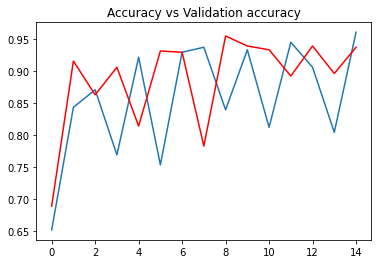

In [ ]:
h = hist.history

h.keys()

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("Accuracy vs Validation accuracy")
plt.show()

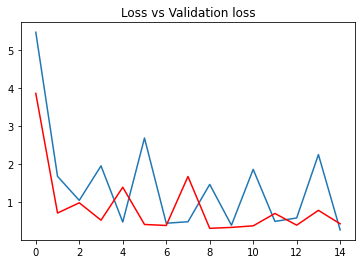

In [ ]:
h = hist.history

h.keys()

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("Loss vs Validation loss")
plt.show()

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

def result_show(path):

  img = load_img(path, target_size = (224, 224))
  input_arr = img_to_array(img)/255

  print("MRI =>")
  plt.imshow(input_arr)
  plt.show()

  input_arr.shape

  input_arr = np.expand_dims(input_arr, axis = 0)

  pred = (model.predict(input_arr) > 0.5).astype("int32")[0][0]

  if pred == 0:
    print("Tumor present")
  else:
    print("No tumor")


MRI =>


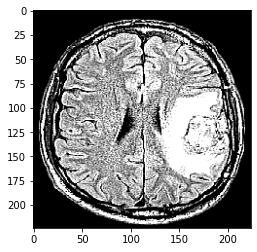

1/1 [==============================] - 1s 645ms/step
Tumor present
MRI =>


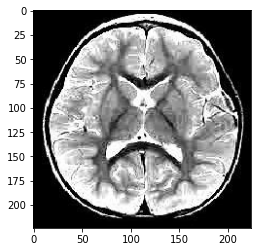

1/1 [==============================] - 0s 23ms/step
No tumor
MRI =>


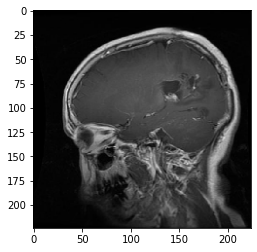

1/1 [==============================] - 0s 23ms/step
Tumor present
MRI =>


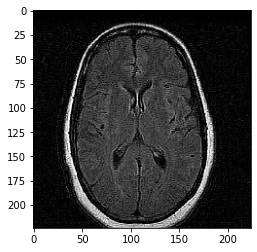

1/1 [==============================] - 0s 21ms/step
No tumor


In [ ]:
path1 = "/content/Brain Tumor Data Set/Brain Tumor/Cancer (1550).jpg"
path2 = "/content/Brain Tumor Data Set/Healthey/Not Cancer  (1028).jpg"
path3 = "/content/Brain Tumor Data Set/Brain Tumor/Cancer (361).jpg"
path4 = "/content/Brain Tumor Data Set/Healthey/Not Cancer  (756).jpg"

result_show(path1)
result_show(path2)
result_show(path3)
result_show(path4)